In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Lecture 21

In [2]:
botox = Table.read_table('bta.csv')
botox.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [3]:
# How many people experienced pain relief in each group?
botox.group('Group',sum)

Group,Result sum
Control,2
Treatment,9


In [4]:
# What proportion of people experienced pain relief in each group?
botox.group('Group',np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [5]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [6]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

# Testing the Hypothesis

In [7]:
observed_diff = difference_of_means(botox, 'Result', 'Group')
observed_diff

0.475

In [8]:
one_simulated_difference(botox, 'Result', 'Group')

0.08750000000000002

In [9]:
simulated_diffs = make_array()

for i in np.arange(10000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

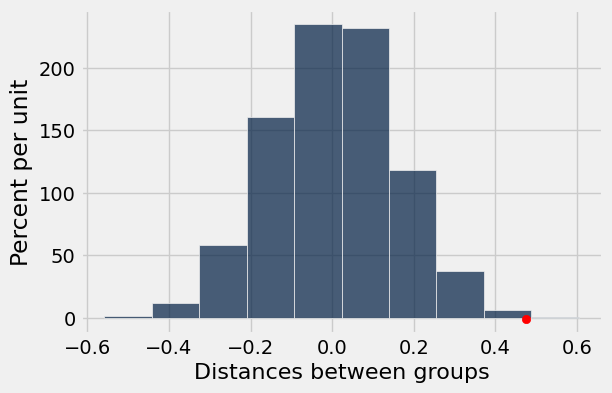

In [10]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)
plots.scatter(observed_diff,-0.01, c='red')

In [11]:
# p-value
sum(simulated_diffs >= observed_diff)/len(simulated_diffs)

0.0071000000000000004

**Conclusion**: The test favors the alternative hypothesis over the null. The result is statistically significant. Therefore, the data supports the hypothesis that the treatment is doing something.

# Activity:
Simulate the scenario described in the slides. 
There are 2000 people in a room. Each person tests

**Null**: The coin is fair

**Alternative**: The coin is unfair based on 100 tosses of a coin, 

**Test statistic** | number of heads - 50 |, and the 5% cutoff for the P-value.

Suppose all coins are fair. About how many people will conclude that their coins are unfair?

In [39]:
num_people = 2000
num_tosses = 100
fair_coin = make_array('H','T')

In [40]:
def get_one_statistic():
    num_heads_in_100_tosses = sum(np.random.choice(fair_coin,num_tosses)=='H')
    return abs(num_heads_in_100_tosses-50)

In [41]:
# Generate statistics for the 2000 people in the room
peoples_statistics = make_array()

for i in np.arange(num_people):
    peoples_statistics = np.append(peoples_statistics, get_one_statistic())

In [42]:
# Now perform the hypothesis test (simulate 10000 test statistics under the null hypothesis)
# NOTE, we will just do this once. All 2000 people should end up with similar empirical distributions of the test statistic
simulated_statistics = make_array()

for i in np.arange(10000):
    simulated_statistics = np.append(simulated_statistics,get_one_statistic())

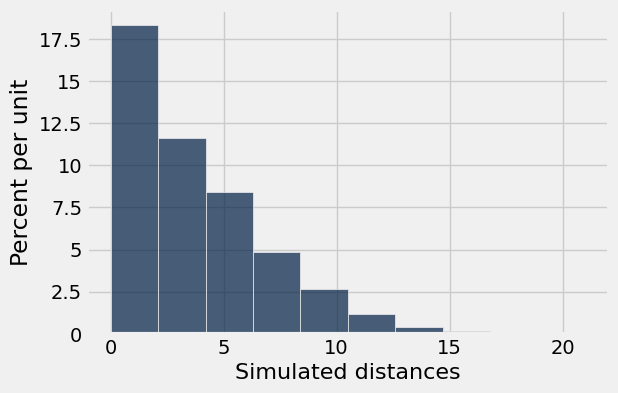

In [43]:
stats_table = Table().with_columns('Simulated distances',simulated_statistics)
stats_table.hist('Simulated distances')

In [44]:
# P-values 
p_vals = make_array()
for persons_stat in peoples_statistics:
    p_vals=np.append(p_vals,np.mean(simulated_statistics>persons_stat))
    
p_vals

array([ 0.3707,  0.3707,  0.7645, ...,  0.3707,  0.3707,  0.3707])

In [45]:
np.sum(p_vals < 0.05)

97

In [46]:
np.sum(p_vals < 0.05)/num_people

0.048500000000000001

In [47]:
# 5% cutoff
cutoff_index = int(0.95 * len(simulated_statistics))
cutoff_index
cutoff_value = stats_table.sort('Simulated distances').column(0).item(cutoff_index)
cutoff_value

10.0

In [48]:
np.average(peoples_statistics >= cutoff_value)

0.048500000000000001

## Discussion Question: Super Soda

In [12]:
def simulate_one_count(sample_size):
    return np.count_nonzero(np.random.choice(['H', 'T'], sample_size) == 'H')
simulate_one_count(200)

89

In [16]:
num_simulations = 10000
counts = make_array()
for i in np.arange(num_simulations):
    counts = np.append(counts, simulate_one_count(200))

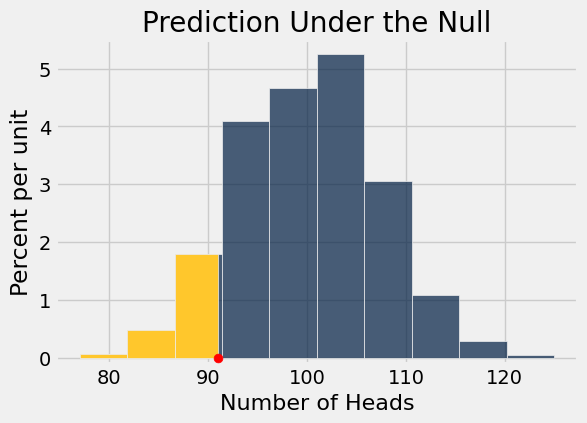

In [17]:
trials = Table().with_column('Number of Heads', counts)
trials.hist(right_end=91)
plots.ylim(-0.001, 0.055)
plots.scatter(91, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null');

In [19]:
np.count_nonzero(counts <= 91)/len(counts)

0.112